In [810]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

# **Products**

## Carga de datos productos

In [811]:
df_products = pd.read_csv("../dataset_amazon/amazon - amazon_product.csv")
print(f"Filas y columnas de productos dataset: {df_products.shape}")

Filas y columnas de productos dataset: (1469, 7)


# Tipos de datos y valores no nulos por columna

In [812]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1469 non-null   object
 1   product_name         1469 non-null   object
 2   category             1469 non-null   object
 3   discounted_price     1469 non-null   object
 4   actual_price         1469 non-null   object
 5   discount_percentage  1469 non-null   object
 6   about_product        1465 non-null   object
dtypes: object(7)
memory usage: 80.5+ KB


# Identificación de valores nulos

In [813]:
print(f" Nulos en productos: \n {df_products.isnull().sum()}")

 Nulos en productos: 
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
about_product          4
dtype: int64


Para identificar qué columnas tienen nulos se usó *isnull().sum()* , para el caso de *products* se encontró que en la columna **about_product** hay 4 nulos, se tomará la decisión de imputar con *"sin info"* más adelante.

# Manejo de valores nulos

### DataFrame *products* 

```
df_products['about_product'] → selecciona la columna about_product del DataFrame df_products.
.fillna("Sin descripción") → reemplaza todos los valores nulos (NaN) de esa columna con el texto "Sin descripción".
El resultado se reasigna a la misma columna.
```

In [814]:
df_products['about_product'] = df_products['about_product'].fillna("Sin descripción")

Comprobamos que ya no tenemos nulos

In [815]:
print(f" Nulos en productos: \n {df_products.isnull().sum()}")

 Nulos en productos: 
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
about_product          0
dtype: int64


# Normalizamos valores en DataFrame **products**

In [816]:
# Precios
df_products['discounted_price'] = df_products['discounted_price'].str.replace('₹','').str.replace(',','').astype(float)
df_products['actual_price'] = df_products['actual_price'].str.replace('₹','').str.replace(',','').astype(float)

# Descuento
df_products['discount_percentage'] = df_products['discount_percentage'].str.replace('%','').astype(float)


# Valores duplicados

Contamos duplicados en **products**, usando *duplicated().sum()* , nos dice cuántas columnas completas están duplicadas, es decir, todas las columnas iguales.

In [817]:
print(df_products.duplicated().sum())

106


En el caso de **products** hay 106 filas iguales, por lo que hay que eliminar filas idénticas para cada caso.

## Eliminación de filas idénticas

In [818]:
#products
df_products = df_products.drop_duplicates()

Revisamos **id's** , es decir en *products*, la columnas de **product_id**, ya que se espera que sean únicos.

In [819]:
print(df_products['product_id'].duplicated().sum())

12


En el caso de *products*, aquellos que había imputado con "Sin descripción" resultaron ser repetidos, por lo que ahora sí eliminaremos esos valores de **about_product** : 

In [820]:
# Eliminar productos cuya descripción es "Sin descripción"
df_products = df_products[df_products['about_product'] != "Sin descripción"]

In [821]:
print(df_products['product_id'].duplicated().sum())

8


Aún se observaron 8 registros con *product_id* repetido.

In [822]:
# IDs de productos repetidos
dup_products = df_products[df_products['product_id'].duplicated(keep=False)]
print(dup_products.sort_values(by='product_id'))


     product_id                                       product_name  \
433  B07DJLFMPS  HP 32GB Class 10 MicroSD Memory Card (U1 TF Ca...   
686  B07DJLFMPS  HP 32GB Class 10 MicroSD Memory Card (U1 TF Ca...   
15   B083342NKJ  MI Braided USB Type-C Cable for Charging Adapt...   
699  B083342NKJ  MI Braided USB Type-C Cable for Charging Adapt...   
10   B08CF3D7QR  Portronics Konnect L POR-1081 Fast Charging 3A...   
428  B08CF3D7QR  Portronics Konnect L POR-1081 Fast Charging 3A...   
2    B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
379  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
623  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
397  B09MT84WV5  Samsung EVO Plus 128GB microSDXC UHS-I U3 130M...   
641  B09MT84WV5  Samsung EVO Plus 128GB microSDXC UHS-I U3 130M...   
336  B0B5B6PQCT  boAt Wave Call Smart Watch, Smart Talk with Ad...   
587  B0B5B6PQCT  boAt Wave Call Smart Watch, Smart Talk with Ad...   
344  B0B5LVS732  Noi

### Manejo de valores duplicados en *products*

Para el caso de **products** decidí quedarme con aquellos que tenían un descuento menor, para considerar "el peor caso".
```
df_products.sort_values('discounted_price') Ordena el DataFrame de menor a mayor según discounted_price.Es decir, los precios más bajos aparecen primero.

.drop_duplicates(subset='product_id', keep='first') Busca duplicados en la columna product_id.

Para cada product_id repetido, mantiene la primera fila (la que tiene el menor discounted_price, porque ya ordenaste).
```

In [823]:
df_products = df_products.sort_values('discounted_price').drop_duplicates(subset='product_id', keep='first')

In [824]:
# Ver cuántos product_id están duplicados
print(f"Ver product_id duplicados: {df_products['product_id'].duplicated().sum()}")  # debe dar 0

# Ver cuántos product_id únicos hay vs total de filas
print(df_products['product_id'].nunique(), "product_id únicos")
print(len(df_products), "filas en total")

Ver product_id duplicados: 0
1351 product_id únicos
1351 filas en total


In [825]:
df_products.shape

(1351, 7)

# **Reviews**

## Carga de datos reviews

In [826]:
df_reviews = pd.read_csv("../dataset_amazon/amazon - amazon_review.csv")
print(f"Filas y columnas de reviews dataset: {df_reviews.shape}")

Filas y columnas de reviews dataset: (1465, 10)


# Tipos de datos y valores no nulos por columna

In [827]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         1465 non-null   object
 1   user_name       1465 non-null   object
 2   review_id       1465 non-null   object
 3   review_title    1465 non-null   object
 4   review_content  1465 non-null   object
 5   img_link        999 non-null    object
 6   product_link    999 non-null    object
 7   product_id      1465 non-null   object
 8   rating          1465 non-null   object
 9   rating_count    1463 non-null   object
dtypes: object(10)
memory usage: 114.6+ KB


De igual manera para *reviews* se identificaron valores nulos, en este caso **img_links** y **product_link** tienen 466 valores nulos, sin embargo, considerando las preguntas a responder en este análisis, esas columnas no nos aportan información relevante, por lo que se sugiere eliminar esas columnas. 

Por otro lado para **rating_count** hay 2 valores nulos, en este caso, se plantea imputarlos con 0.

In [828]:
print(f" Nulos en reviews: \n  {df_reviews.isnull().sum()}")

 Nulos en reviews: 
  user_id             0
user_name           0
review_id           0
review_title        0
review_content      0
img_link          466
product_link      466
product_id          0
rating              0
rating_count        2
dtype: int64


### DataFrame *reviews* 

```
.drop(columns=[...]) → elimina columnas completas del DataFrame. Aquí borramos img_link y product_link.
Se reasigna a df_reviews para guardar el DataFrame ya sin esas columnas.
```
Imputamos nulos en rating_count con ceros.

In [829]:
df_reviews = df_reviews.drop(columns=['img_link', 'product_link'])

In [830]:
# Imputar con 0 si no hay valor, indicando que no se registró número de reseñas
df_reviews['rating_count'] = df_reviews['rating_count'].fillna(0)


In [831]:

print(f" Nulos en reviews: \n  {df_reviews.isnull().sum()}")

 Nulos en reviews: 
  user_id           0
user_name         0
review_id         0
review_title      0
review_content    0
product_id        0
rating            0
rating_count      0
dtype: int64


De igual manera contamos duplicados en *reviews* 

In [832]:
print(df_reviews.duplicated().sum())

70


 En **reviews** hubo 70 filas iguales, por lo que hay que eliminar filas idénticas.

# Eliminación de filas idénticas

In [833]:
#reviews
df_reviews = df_reviews.drop_duplicates()


## Revisión de IDs en reviews

Revisamos los identificadores en el dataset de reseñas. En particular:

- **product_id** debería ser único para cada producto.

- **review_id** identifica cada reseña individual, pero para nuestro análisis agregado por producto, nos interesa una fila por producto, consolidando la información de todas sus reseñas.

> Nota: Al mantener una fila por **product_id**, perdemos la granularidad de las reseñas individuales, pero simplifica el análisis de métricas por producto como promedio de rating, precio, descuento, etc.

In [834]:
# Revisar cuántos product_id duplicados hay
print(f"Duplicados en product_id (dentro de reviews) antes de limpiar: {df_reviews['product_id'].duplicated().sum()}")  

Duplicados en product_id (dentro de reviews) antes de limpiar: 44


Se observaron 44 duplicados de **product_id** en *reviews*.

## Manejo de duplicados por producto en *reviews*

In [835]:
df_reviews = df_reviews.drop_duplicates(subset=['product_id'])

In [836]:
# Ver cuántos product_id están duplicados
print(f"Ver product_id duplicados: {df_reviews['product_id'].duplicated().sum()}")  # debe dar 0 

# Ver cuántos product_id únicos hay vs total de filas 
print(df_reviews['product_id'].nunique(), "product_id únicos") 
print(len(df_reviews), "filas en total")


Ver product_id duplicados: 0
1351 product_id únicos
1351 filas en total


## Revisamos tipos de datos

In [837]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1351 entries, 0 to 1464
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         1351 non-null   object
 1   user_name       1351 non-null   object
 2   review_id       1351 non-null   object
 3   review_title    1351 non-null   object
 4   review_content  1351 non-null   object
 5   product_id      1351 non-null   object
 6   rating          1351 non-null   object
 7   rating_count    1351 non-null   object
dtypes: object(8)
memory usage: 95.0+ KB


### Castear **rating** y **rating_count**

pd.to_numeric(..., errors='coerce') convierte a número lo que pueda. Si encuentra algo inválido o vacío, lo deja como NaN.

In [838]:
# Quitar comas y convertir rating_count a int
df_reviews['rating_count'] = df_reviews['rating_count'].str.replace(',', '')
df_reviews['rating_count'] = pd.to_numeric(df_reviews['rating_count'], errors='coerce')

# Convertir rating a float
df_reviews['rating'] = pd.to_numeric(df_reviews['rating'], errors='coerce')


# Imputar valores faltantes
df_reviews['rating_count'] = df_reviews['rating_count'].fillna(0).astype(int)
# Asegurar que rating sea float, dejando los NaN como están
df_reviews['rating'] = pd.to_numeric(df_reviews['rating'], errors='coerce')


In [839]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1351 entries, 0 to 1464
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         1351 non-null   object 
 1   user_name       1351 non-null   object 
 2   review_id       1351 non-null   object 
 3   review_title    1351 non-null   object 
 4   review_content  1351 non-null   object 
 5   product_id      1351 non-null   object 
 6   rating          1350 non-null   float64
 7   rating_count    1351 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 95.0+ KB


In [840]:
df_reviews.shape

(1351, 8)

# Filtrar datos fuera del alcance

Ya limpiamos nulos y duplicados, ahora se necesita filtrar datos fuera del alcance. Esto se refiere a revisar outliers, inconsistencias o valores que no sirven para responder tus preguntas.

Con base en mis preguntas de investigación:

- `Ratings → descartar valores fuera de rango. Generalmente Amazon usa de 1 a 5 estrellas.`

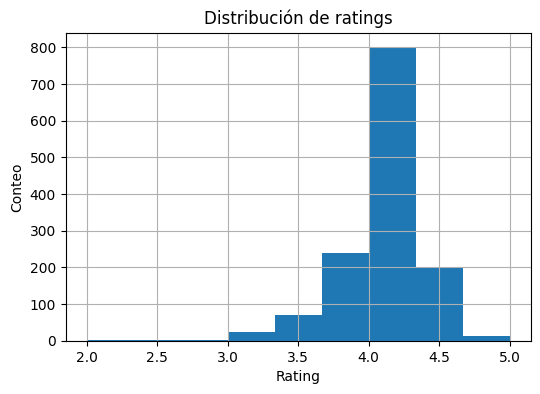

In [841]:
# Histograma
plt.figure(figsize=(6,4))
df_reviews['rating'].hist(bins=9)   # bins para medias estrellas
plt.xlabel('Rating')
plt.ylabel('Conteo')
plt.title('Distribución de ratings')
plt.show()


In [842]:
# Conteos y resumen
print(df_reviews['rating'].describe())    # media, std, min, max, etc.

# Ver si hay ceros o valores fuera de rango
print("Valores == 0:", (df_reviews['rating'] == 0).sum())
print("Valores < 1 o > 5:", ((df_reviews['rating'] < 1) | (df_reviews['rating'] > 5)).sum())

# Mostrar ejemplos de filas con rating problemático
display(df_reviews.loc[(df_reviews['rating'] < 1) | (df_reviews['rating'] > 5)].head(10))


count    1350.000000
mean        4.091852
std         0.297444
min         2.000000
25%         3.900000
50%         4.100000
75%         4.300000
max         5.000000
Name: rating, dtype: float64
Valores == 0: 0
Valores < 1 o > 5: 0


,user_id,user_name,review_id,review_title,review_content,product_id,rating,rating_count


> Hay una fila con **NaN**, sin embargo, no fue considerado para la estadística básica, _pandas_ omite ese valor, los demás valores (1350 filas) son correctos.

In [843]:
# df_reviews = df_reviews[(df_reviews['rating'] >= 1) & (df_reviews['rating'] <= 5)]

- `Precios → Tenemos preguntas sobre actual_price, discounted_price, discount_percentage. Debemos revisar y eliminar precios negativos o absurdos (ejemplo: actual_price < discounted_price cuando no debería), así como definir un rango realista.`

In [844]:
# Antes de filtrar
print("Cantidad de filas originales:", len(df_products))

# Filtrar precios positivos
filtro_precios = (df_products['actual_price'] > 0) & (df_products['discounted_price'] > 0)
print("Filas con precios positivos:", filtro_precios.sum())
df_products = df_products[filtro_precios]

# Filtrar precios no absurdos
filtro_umbral = df_products['actual_price'] < 140000  # o el umbral que definas
print("Filas con actual_price < 140000:", filtro_umbral.sum())
df_products = df_products[filtro_umbral]

# Filtrar descuento válido
filtro_descuento = (df_products['discount_percentage'] >= 0) & (df_products['discount_percentage'] <= 100)
print("Filas con descuento válido (0-100%):", filtro_descuento.sum())
df_products = df_products[filtro_descuento]

# Filas finales
print("Cantidad de filas finales:", len(df_products))


Cantidad de filas originales: 1351
Filas con precios positivos: 1351
Filas con actual_price < 140000: 1351
Filas con descuento válido (0-100%): 1351
Cantidad de filas finales: 1351


Nulos en precios:
 actual_price        0
discounted_price    0
dtype: int64

Resumen estadístico:
        actual_price  discounted_price
count    1351.000000       1351.000000
mean     5690.510452       3304.587098
std     11218.918302       7174.024934
min        39.000000         39.000000
25%       899.000000        349.000000
50%      1790.000000        899.000000
75%      4575.000000       2174.000000
max    139900.000000      77990.000000

Precios <= 0:
actual_price        0
discounted_price    0
dtype: int64

Absurdos (discounted > actual): 0


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product


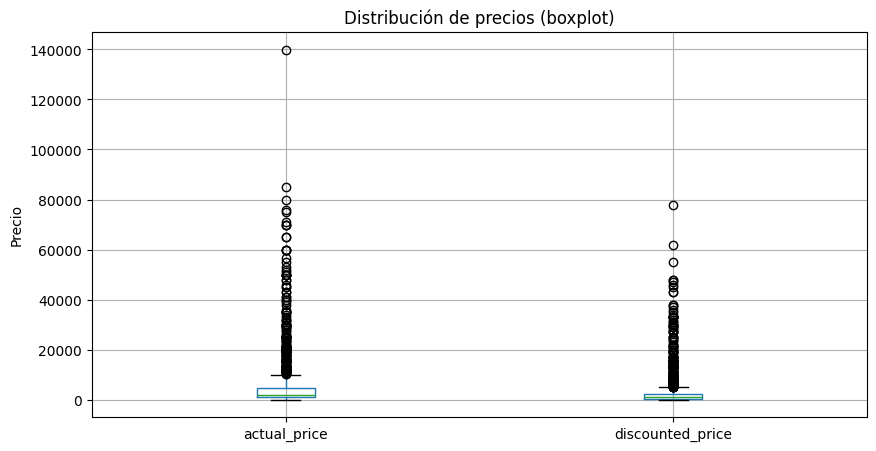

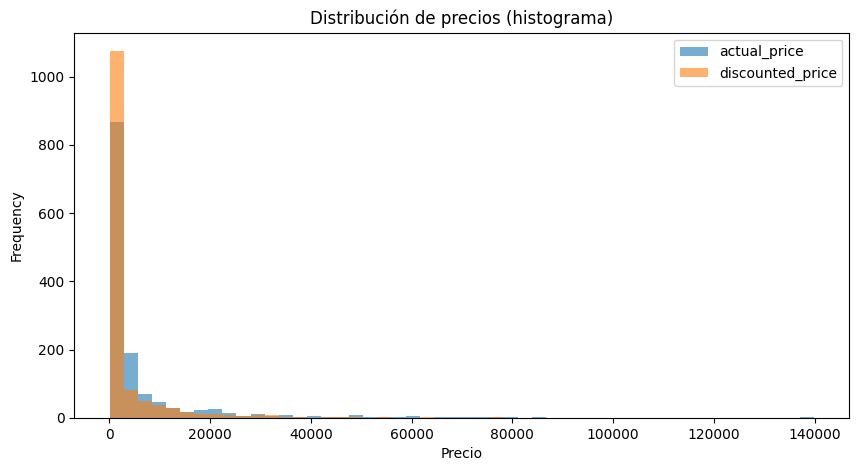

In [845]:
# 1. Revisar valores nulos
print("Nulos en precios:\n", df_products[['actual_price','discounted_price']].isnull().sum())

# 2. Revisar mínimos y máximos
print("\nResumen estadístico:")
print(df_products[['actual_price','discounted_price']].describe())

# 3. Ver cuántos precios negativos o cero
print("\nPrecios <= 0:")
print((df_products[['actual_price','discounted_price']] <= 0).sum())

# 4. Revisar absurdos: cuando el precio con descuento es mayor al original
absurdos = df_products[df_products['discounted_price'] > df_products['actual_price']]
print(f"\nAbsurdos (discounted > actual): {len(absurdos)}")
display(absurdos.head())

# 5. Gráfico: boxplot para ver outliers
plt.figure(figsize=(10,5))
df_products[['actual_price','discounted_price']].boxplot()
plt.title("Distribución de precios (boxplot)")
plt.ylabel("Precio")
plt.show()

# 6. Histograma para ver rango
df_products[['actual_price','discounted_price']].plot(kind='hist', bins=50, alpha=0.6, figsize=(10,5))
plt.title("Distribución de precios (histograma)")
plt.xlabel("Precio")
plt.show()

In [846]:
def detectar_precios_fuera_de_rango(df, precio_max=100000):
    """
    Marca filas con precios sospechosos o descuentos inconsistentes.
    
    Parámetros:
    - df: dataframe con columnas 'actual_price' y 'discounted_price'
    - precio_max: precio máximo considerado razonable
    
    Retorna:
    - df_outliers: dataframe con filas sospechosas
    """
    # Precios fuera de rango
    mask_precio = (df['actual_price'] > precio_max) | (df['discounted_price'] > precio_max)
    
    # Descuento negativo o descuento mayor al precio
    mask_descuento = df['discounted_price'] > df['actual_price']
    
    # Combinar
    mask_sospechoso = mask_precio | mask_descuento
    
    df_outliers = df[mask_sospechoso].copy()
    df_outliers['precio_fuera_rango'] = mask_precio
    df_outliers['descuento_invalido'] = mask_descuento
    
    return df_outliers

# Usar la función
df_outliers = detectar_precios_fuera_de_rango(df_products)
print(df_outliers.to_string())


     product_id                                                                      product_name                                                       category  discounted_price  actual_price  discount_percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

> Distribución
- La gran mayoría de los precios (tanto actual_price como discounted_price) están concentrados en valores bajos (menores a 5,000).
- Existen algunos outliers muy altos (por ejemplo, un actual_price de hasta 139,900 y discounted_price de hasta 77,990).
- Esto genera una cola larga a la derecha en el histograma (distribución sesgada positivamente).

> Consistencia
- No hay nulos en los precios → ✅ limpio en ese aspecto.
- No hay precios <= 0 → ✅ bien.
- No hay casos absurdos (discounted_price > actual_price) → ✅ los descuentos son válidos.

- `rating_count (recuento de calificaciones) → Hay que asegurarse de no contar productos con rating_count = 0 porque no aportan.`

Cantidad de filas originales: 1351


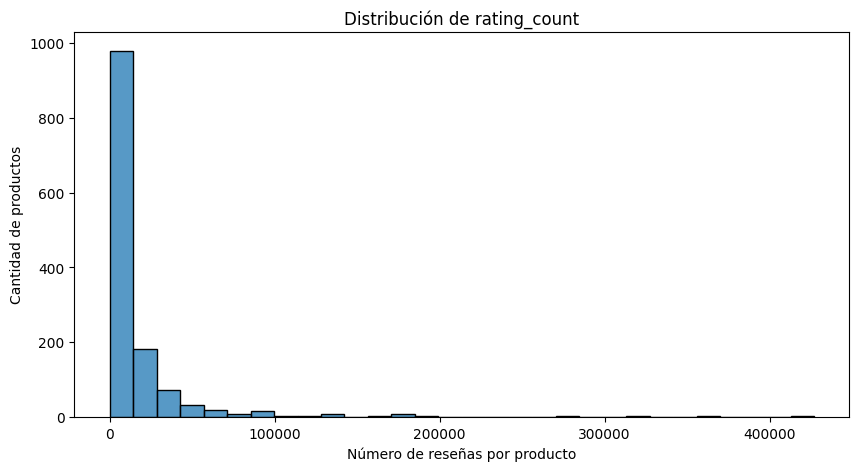

count      1351.000000
mean      17618.373797
std       42119.882419
min           0.000000
25%        1094.500000
50%        4736.000000
75%       15995.000000
max      426973.000000
Name: rating_count, dtype: float64


In [847]:
# 1. Cantidad de filas antes de filtrar
print("Cantidad de filas originales:", len(df_reviews))

# 2. Histograma para revisar distribución de rating_count
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df_reviews['rating_count'], bins=30, kde=False)
plt.title("Distribución de rating_count")
plt.xlabel("Número de reseñas por producto")
plt.ylabel("Cantidad de productos")
plt.show()

# 3. Revisar estadísticas descriptivas
print(df_reviews['rating_count'].describe())


> Distribución
- La gran mayoría de productos tienen pocas reseñas (entre 0 y unos cientos).
- Hay una cola muy larga hacia la derecha, con productos que llegan a tener cientos de miles de reseñas → esto es típico de distribuciones de popularidad (pocos productos muy populares concentran la mayoría de reseñas).
- Es una distribución altamente sesgada positivamente (right-skewed).

> Estadísticos

- Mínimo: 0 (2 productos sin reseñas).
- Mediana (50%): 4,736 → La mitad de los productos tiene ≤ 4,736 reseñas.
- Media (≈ 17,600): mucho más alta que la mediana → hay outliers que inflan el promedio.
- Máximo: 426,973 → un producto extremadamente popular.
- Desviación estándar (≈ 42,120): enorme en relación a la media → confirma la presencia de outliers.

# Unión de tablas 

In [848]:
df_merged = pd.merge(
    df_products[['product_id','product_name','category','discounted_price','actual_price','discount_percentage']],
    df_reviews[['product_id','rating','rating_count','review_title','review_content']],
    on='product_id',
    how='inner'  # solo productos que estén en ambos
)

print(df_merged.shape)
df_merged.head()


(1351, 10)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_title,review_content
0,B00URH5E34,Inventis 5V 1.2W Portable Flexible USB LED Lig...,Computers&Accessories|Accessories&Peripherals|...,39.00,39.0,0.0,3.6,13572,"it worked properly for almost one year,ok,USB ...","very good product, very bright, easy to use, i..."
1,B00MFPCY5C,GIZGA essentials Universal Silicone Keyboard P...,Computers&Accessories|Accessories&Peripherals|...,39.00,299.0,87.0,3.5,15233,"Good,Affordable and best,Check the size !,valu...","Value for money,Grt product,Please ensure the ..."
2,B08TDJ5BVF,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,Computers&Accessories|Accessories&Peripherals|...,39.00,39.0,0.0,3.8,3344,"Lighting,TINY & USEFUL.,Fair product,Worth for...","Recieved a wrong color.. But ok..,Simple and Q..."
3,B07KCMR8D6,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,OfficeProducts|OfficePaperProducts|Paper|Stati...,50.00,50.0,0.0,4.3,5792,"Nice ball pen,Good product,Average,Nice Pen,It...","Very nice ball pen,Thank you Amazon,Easy to ho..."
4,B0B3MQXNFB,FLiX (Beetel Flow USB to Micro USB PVC Data Sy...,Computers&Accessories|Accessories&Peripherals|...,57.89,199.0,71.0,4.0,9378,"Worked on iPhone 7 and didn’t work on XR,Good ...",Worked on iPhone 7 and didn’t work on iPhone X...


Viendo las categorías se decidió agregar una columna nueva donde solo tengamos la categoría principal de cada producto, además de todas las subcategorías como actualmente se tiene 

In [849]:
# Crear columna con la categoría principal (primer nivel antes del primer "|")
df_merged["category_main"] = df_merged["category"].str.split("|").str[0]


In [850]:
# Crear otra columna para obtener marca a partir de product_name, extraer marca como primer palabra del product_name
df_merged['brand'] = df_merged['product_name'].str.split().str[0]

In [851]:
# Revisar los top 20 valores únicos
print(df_merged['brand'].value_counts().head(20))

brand
boAt            52
Samsung         33
AmazonBasics    27
Bajaj           26
Redmi           25
Amazon          23
Portronics      21
Wayona          21
Fire-Boltt      21
HP              20
Noise           20
Havells         19
Philips         18
MI              17
Ambrane         17
Zebronics       16
SanDisk         16
Crompton        15
TP-Link         15
Logitech        15
Name: count, dtype: int64


In [852]:
df_merged.shape

(1351, 12)

## Guardo mis versiones limpias y la unión de tablas

In [853]:
import os

# Crear carpeta si no existe
os.makedirs("../data_limpia", exist_ok=True)

# Guardar productos limpios
df_products.to_csv("../data_limpia/productos_limpios.csv", index=False, encoding="utf-8")

# Guardar reseñas limpias
df_reviews.to_csv("../data_limpia/reseñas_limpias.csv", index=False, encoding="utf-8")

# Guardar tabla combinada
df_merged.to_csv("../data_limpia/productos_reseñas.csv", index=False, encoding="utf-8")

# **Análisis exploratorio**

Dimensiones del dataset: (1351, 12)

Tipos de datos y nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1351 non-null   object 
 1   product_name         1351 non-null   object 
 2   category             1351 non-null   object 
 3   discounted_price     1351 non-null   float64
 4   actual_price         1351 non-null   float64
 5   discount_percentage  1351 non-null   float64
 6   rating               1350 non-null   float64
 7   rating_count         1351 non-null   int64  
 8   review_title         1351 non-null   object 
 9   review_content       1351 non-null   object 
 10  category_main        1351 non-null   object 
 11  brand                1351 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 126.8+ KB
None

Resumen estadístico (numéricas):
       discounted_price   act

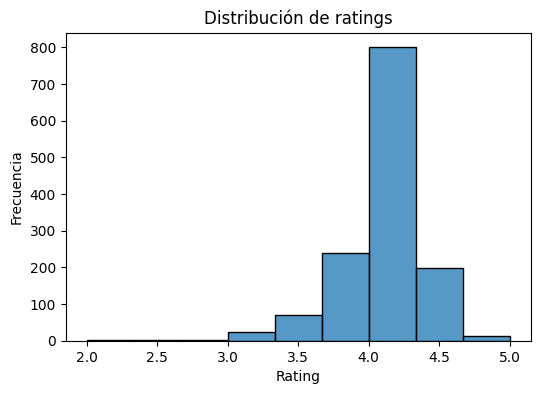

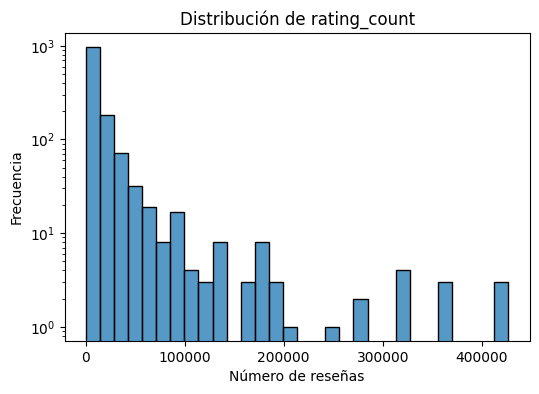

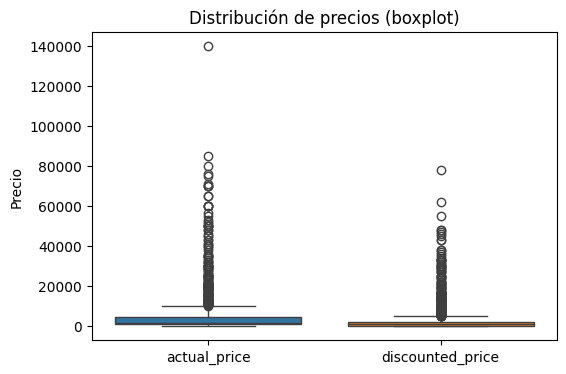

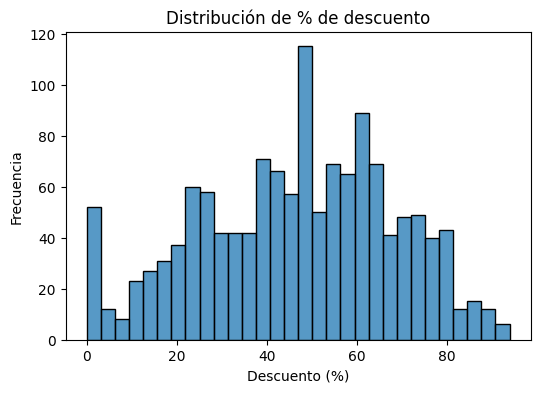

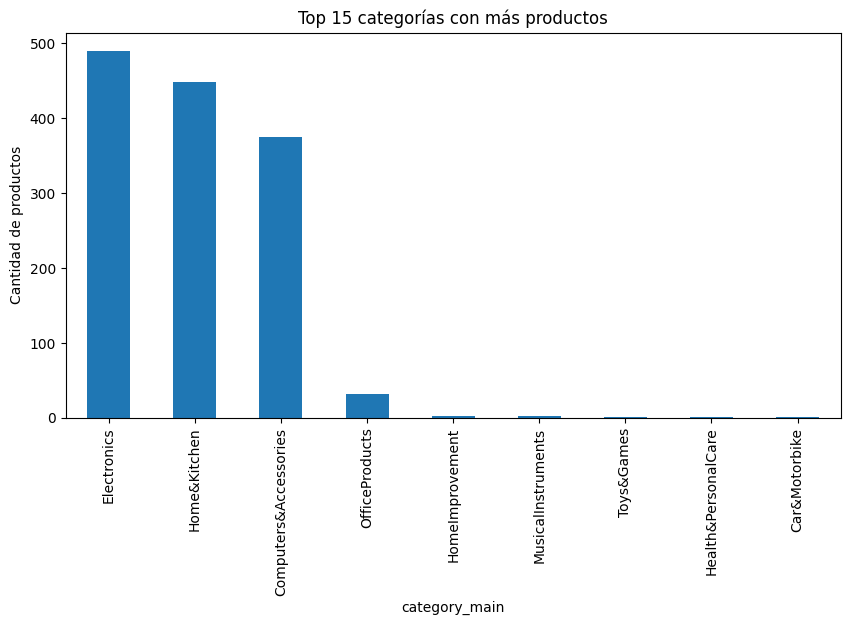


Resumen por categoría (promedios y sumas):


,rating,rating_count,actual_price,discounted_price,discount_percentage
category_main,,,,,
OfficeProducts,4.309677,149675,397.193548,301.580645,12.354839
Toys&Games,4.300000,15867,150.000000,150.000000,0.000000
HomeImprovement,4.250000,8566,799.000000,337.000000,57.500000
Computers&Accessories,4.153867,6335177,1855.345653,947.488960,53.197333
Electronics,4.077755,14208406,10418.083673,6225.277551,49.916327
Home&Kitchen,4.040716,2991069,4162.073661,2330.615647,40.120536
Health&PersonalCare,4.000000,3663,1900.000000,899.000000,53.000000
MusicalInstruments,3.900000,88882,1347.000000,638.000000,46.000000
Car&Motorbike,3.800000,1118,4000.000000,2339.000000,42.000000


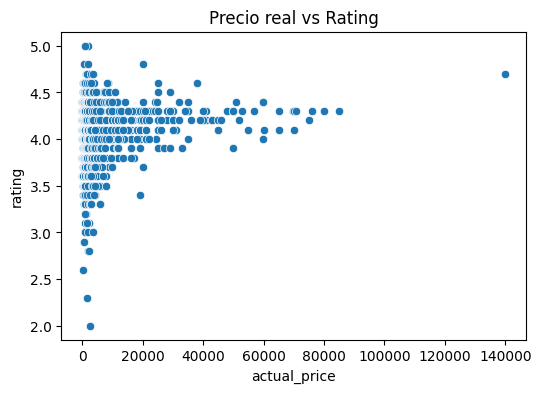

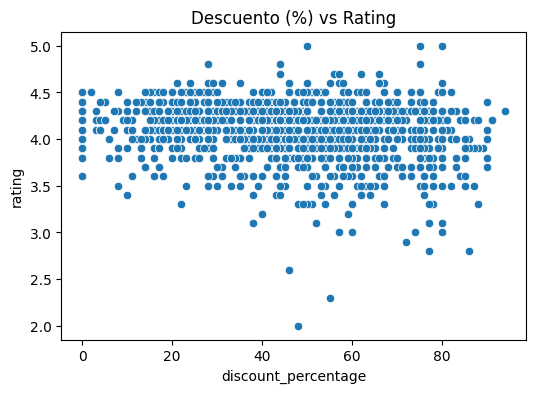

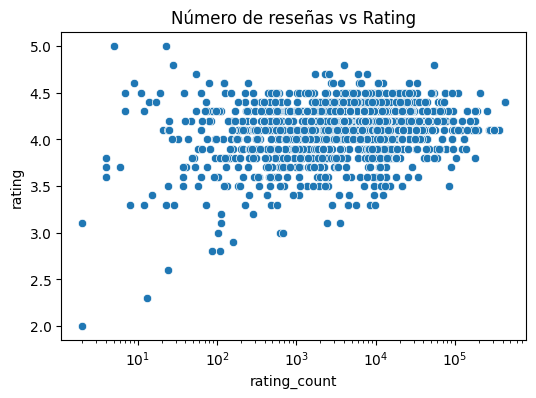


Top 10 productos mejor calificados (solo con reseñas):


,product_name,category,rating,rating_count
407,Syncwire LTG to USB Cable for Fast Charging Co...,Computers&Accessories|Accessories&Peripherals|...,5.0,5
484,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,Computers&Accessories|Accessories&Peripherals|...,5.0,23
861,Swiffer Instant Electric Water Heater Faucet T...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",4.8,53803
1142,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.8,3964
242,"Oratech Coffee Frother electric, milk frother ...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.8,28
1350,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",4.7,5935
878,Campfire Spring Chef Prolix Instant Portable W...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",4.7,2591
603,"FIGMENT Handheld Milk Frother Rechargeable, 3-...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.7,1729
602,Multifunctional 2 in 1 Electric Egg Boiling St...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.7,2300
725,Spigen EZ Fit Tempered Glass Screen Protector ...,Electronics|Mobiles&Accessories|MobileAccessor...,4.7,7779



Top 10 productos con más reseñas:


,product_name,category,rating,rating_count
303,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","Electronics|HomeTheater,TV&Video|Accessories|C...",4.4,426973
304,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","Electronics|HomeTheater,TV&Video|Accessories|C...",4.4,426973
177,AmazonBasics Flexible Premium HDMI Cable (Blac...,"Electronics|HomeTheater,TV&Video|Accessories|C...",4.4,426973
334,boAt Bassheads 100 in Ear Wired Earphones with...,"Electronics|Headphones,Earbuds&Accessories|Hea...",4.1,363713
382,boAt Bassheads 100 in Ear Wired Earphones with...,"Electronics|Headphones,Earbuds&Accessories|Hea...",4.1,363713
366,boAt BassHeads 100 in-Ear Wired Headphones wit...,"Electronics|Headphones,Earbuds&Accessories|Hea...",4.1,363711
1208,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",Electronics|Mobiles&Accessories|Smartphones&Ba...,4.1,313836
1176,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",Electronics|Mobiles&Accessories|Smartphones&Ba...,4.1,313836
1194,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",Electronics|Mobiles&Accessories|Smartphones&Ba...,4.1,313832
1177,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...",Electronics|Mobiles&Accessories|Smartphones&Ba...,4.1,313832



Categorías con mayor descuento promedio:


,rating,rating_count,actual_price,discounted_price,discount_percentage
category_main,,,,,
HomeImprovement,4.250000,8566,799.000000,337.000000,57.500000
Computers&Accessories,4.153867,6335177,1855.345653,947.488960,53.197333
Health&PersonalCare,4.000000,3663,1900.000000,899.000000,53.000000
Electronics,4.077755,14208406,10418.083673,6225.277551,49.916327
MusicalInstruments,3.900000,88882,1347.000000,638.000000,46.000000
Car&Motorbike,3.800000,1118,4000.000000,2339.000000,42.000000
Home&Kitchen,4.040716,2991069,4162.073661,2330.615647,40.120536
OfficeProducts,4.309677,149675,397.193548,301.580645,12.354839
Toys&Games,4.300000,15867,150.000000,150.000000,0.000000


In [854]:
# ====================================
# Análisis Exploratorio de Datos (EDA)
# ====================================

# 1. Información general
print("Dimensiones del dataset:", df_merged.shape)
print("\nTipos de datos y nulos:")
print(df_merged.info())
print("\nResumen estadístico (numéricas):")
print(df_merged.describe())

# 2. Distribución de variables clave
plt.figure(figsize=(6,4))
sns.histplot(df_merged['rating'], bins=9, kde=False)
plt.title("Distribución de ratings")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df_merged['rating_count'], bins=30, kde=False)
plt.title("Distribución de rating_count")
plt.xlabel("Número de reseñas")
plt.ylabel("Frecuencia")
plt.yscale("log")  # útil si hay valores muy altos
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=df_merged[['actual_price','discounted_price']])
plt.title("Distribución de precios (boxplot)")
plt.ylabel("Precio")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df_merged['discount_percentage'], bins=30, kde=False)
plt.title("Distribución de % de descuento")
plt.xlabel("Descuento (%)")
plt.ylabel("Frecuencia")
plt.show()

# 3. Análisis categórico
plt.figure(figsize=(10,5))
df_merged['category_main'].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 categorías con más productos")
plt.ylabel("Cantidad de productos")
plt.show()

cat_summary = df_merged.groupby('category_main').agg({
    'rating':'mean',
    'rating_count':'sum',
    'actual_price':'mean',
    'discounted_price':'mean',
    'discount_percentage':'mean'
}).sort_values(by='rating', ascending=False)

print("\nResumen por categoría (promedios y sumas):")
display(cat_summary.head(10))

# 4. Relaciones entre variables
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_merged, x="actual_price", y="rating")
plt.title("Precio real vs Rating")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df_merged, x="discount_percentage", y="rating")
plt.title("Descuento (%) vs Rating")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df_merged, x="rating_count", y="rating")
plt.title("Número de reseñas vs Rating")
plt.xscale("log")
plt.show()

# 5. Tablas resumen

# Filtrar productos con al menos una reseña
df_valid_ratings = df_merged[df_merged['rating_count'] > 0]

# Top 10 productos mejor calificados
print("\nTop 10 productos mejor calificados (solo con reseñas):")
display(df_valid_ratings[['product_name','category','rating','rating_count']]
        .sort_values(by='rating', ascending=False)
        .head(10))


print("\nTop 10 productos con más reseñas:")
display(df_merged[['product_name','category','rating','rating_count']].sort_values(by='rating_count', ascending=False).head(10))

print("\nCategorías con mayor descuento promedio:")
display(cat_summary.sort_values(by='discount_percentage', ascending=False).head(10))
